<a href="https://colab.research.google.com/github/comojin1994/AlexNet/blob/master/Evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Tensorflow 2.0

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 450kB 49.2MB/s 
     |████████████████████████████████| 3.8MB 57.5MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


### Mount Google Drive

In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd ./gdrive/My\ Drive/Deep_learning/Paper_implementation/AlexNet
!ls

/content/gdrive/My Drive/Deep_learning/Paper_implementation/AlexNet
architecture	image  ngrok
checkpoints	logs   ngrok-stable-linux-amd64.zip
Evaluate.ipynb	Model  Training.ipynb


### Load Library

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, math
from tensorflow.keras import layers, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from datetime import datetime
from tqdm import tqdm_notebook
from glob import glob
from PIL import Image
%matplotlib inline
print(tf.__version__)

2.0.0


### Hyperparameter

In [0]:
num_epoch = 100
batch_size = 32
input_shape = (32, 32, 3)
learning_rate = 0.001
dropout_rate = 0.25
num_classes = 10
initial_epoch = 1

loss_ftn = tf.keras.losses.sparse_categorical_crossentropy
metrics = ['accuracy']
optm = tf.keras.optimizers.Adam(learning_rate)

### Load architecture

In [6]:
model_path = os.path.join('architecture', 'AlexNet_Architecture.json')
with open(model_path, 'r') as f:
  model = model_from_json(f.read())
model.compile(optimizer=optm, loss=loss_ftn, metrics=metrics)
model.summary()

Model: "My_AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 96)        2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       221440    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 384)         1

### Load Weights

In [7]:
weight_path = os.path.join('checkpoints/variables', 'variables')
model.load_weights(weight_path)

### Load Data

In [8]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()
train_x.shape, train_y.shape, test_x.shape, test_y.shape

170500096/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Make Generator

In [0]:
test_datagen = ImageDataGenerator(
    rescale=1./255.,
    dtype=tf.float32
)
test_generator = test_datagen.flow(test_x, test_y, batch_size=batch_size)

### Evalutate

In [10]:
model.evaluate_generator(
    test_generator,
    steps=len(test_generator),
    verbose=1
)

313/313 [==============================] - 10s 33ms/step - loss: 0.7538 - accuracy: 0.7490


[0.7537891070682782, 0.749]

### Predict
0. airplanes      
1. cars           
2. birds          
3. cats           
4. deer           
5. dogs
6. frogs
7. horses
8. ships
9. trucks

In [17]:
pred = model.predict(tf.cast(test_x[10:20], dtype=tf.float32))
pred = tf.argmax(pred, axis=1)
print(pred)
print(test_y[10:20])

tf.Tensor([9 9 5 5 9 8 1 9 9 1], shape=(10,), dtype=int64)
[[0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]]


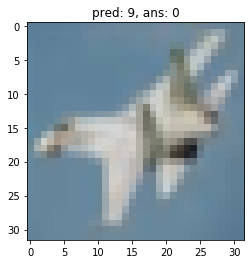

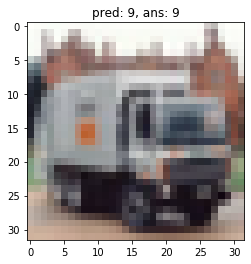

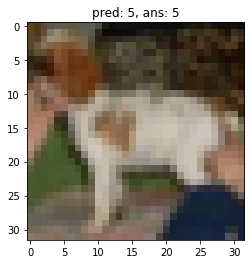

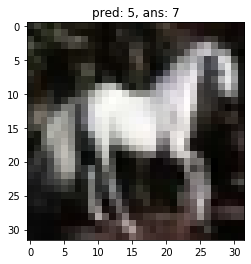

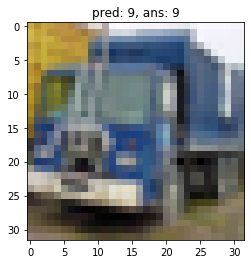

In [20]:
for i in range(5):
  plt.title('pred: %d, ans: %d' % (pred.numpy()[i], test_y[10+i][0]))
  plt.imshow(test_x[10+i])
  plt.show()